In [1]:
#%load_ext autoreload
#%autoreload 2

from kraken import binarization
import matplotlib.pyplot as plt

from PIL import Image
from kalchas.ocr import list_available_models, load_ocr_model
from kalchas.utils import segment 
import numpy as np

In [2]:
list_available_models()

['model1']

In [3]:
model = load_ocr_model('model1')

In [31]:
image_path = "images/test_page.png"
image  = Image.open(image_path).convert('L')

#  page segmentation 
bboxes = segment(image)

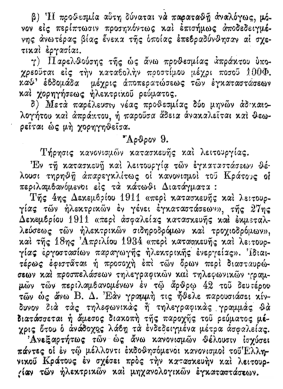

In [32]:
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

In [33]:
 
# get the bounding boxes
boxes = bboxes['boxes']

In [34]:
# loop through segments and crop lines
np_img = np.array(image)
images = [] 
for index in range(len(boxes)):

    x1, y1, x2, y2 = boxes[index]
    cropped_im = np_img[y1:y2, x1:x2,]

    dest_img = Image.fromarray(cropped_im.copy()) 
    # dest_img = binarization.nlbin(dest_img) 
    
    images.append( dest_img)

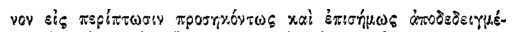

νον εἰς περίπτωσιν προσηκόντως καὶ ἐπισήμως ἀποδεδειγμέ-
------------------------


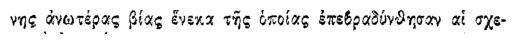

νης ἀνωτέρας βίας ἕνεαα τῆς ὁποίας ἐπεβραδύνθησαν αἱ σχε-
------------------------


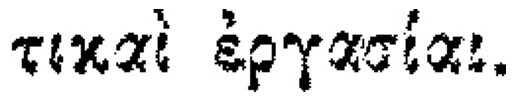

τικαὶ ἐργασίαι.
------------------------


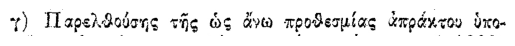

γ) Παρελθούσης τῆς ὡς ἄνω προθεσμίας ἀπράκτου ὑπο-
------------------------


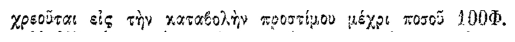

χρεούται εἰς τὴν καταβολὴν προστίμου μέχρι ποσοῦ 100Φ,
------------------------


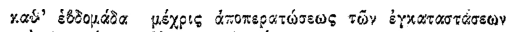

παρ’ ἑθδομάδα μέχρις ἀποκερατώσεως τῶν ἐγκαταστάσεων
------------------------


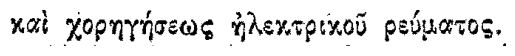

καὶ χορηγήσεως ἠλεκτρικοῦ ρεύματος.
------------------------


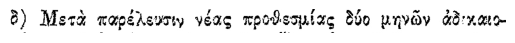

δ) Μετὰ παρέλευσιν νέας προθεσμίας δύο μηνῶν ἀδικαιο-
------------------------


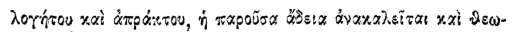

λογήτου καὶ ἀπράκτου, ἡ παροῦσα ἄδεια ἀνακαλεῖται καὶ θεω-
------------------------


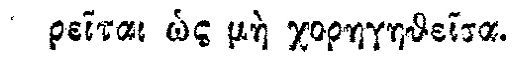

ρεῖται ὡς μὴ χορηγηθεῖσα.
------------------------


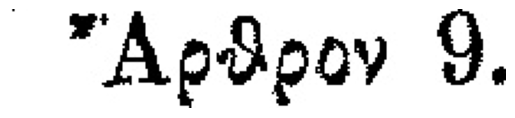

Ἄρθρον .
------------------------


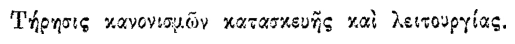

Τήρησις κανονισμῶν κατασκευῆς καὶ λειτουργίας.
------------------------


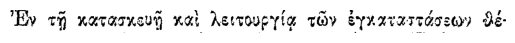

Ἐν τῇ κατασκευῇ καὶ λειτουργίᾳ τῶν ἐγκαταστάσεων θέ-
------------------------


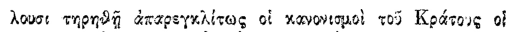

λουσι τηρηθῇ ἀπαρεγκλίτως οἱ κανονισμοὶ τοῦ Κράτους οἱ
------------------------


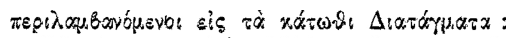

περιλαμβανόμενοι εἰς τὰ κάτωθι Διατάγματα:
------------------------


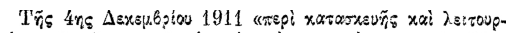

 Τῆς ης Δεκεμβρίου 1911 <περὶ κατασκευῆς καὶ λειτουρ-
------------------------


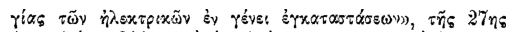

γίας τῶν ἠλεκτριαῶν ἐν γένει ἐγκαταστάσεων», τῆς 20ης
------------------------


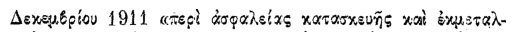

Δεκεμβρίου 1911 <περὶ ἀσφαλείας κατασκευῆς καὶ ἐκμεταλ-
------------------------


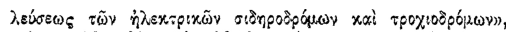

λεύσεως τῶν ἠλεκτρικῶν σιδηροδρόμων καὶ τροχιοδρόμωνν,
------------------------


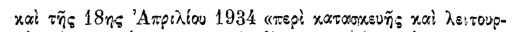

καὶ τῆς 18ης Ἀπριλίου 1934 <περὶ κατασκευῆς καὶ λειτουρ-
------------------------


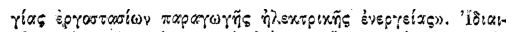

γίας ἐργοστασίων παραγωγῆς ἠλεκτρικῆς ἐνεργεία>». Ἰδιαι-
------------------------


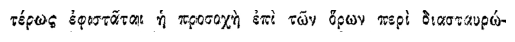

τέρως ἐφιστᾶται ἡ προσοχὴ ἐπὶ τῶν ὅρων περὶ διασταυρώ-
------------------------


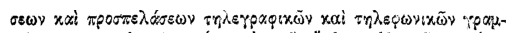

σεων καὶ προσπελάσεων τηλεγραφικῶν καὶ τηλεφωνικῶν τραμ-
------------------------


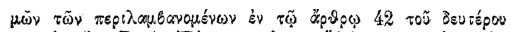

μῶν τῶν περιλαμβανομένων ἐν τῷ ἄρθρῷ 62 τοῦ δευτέρου
------------------------


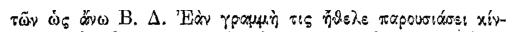

τῶν ὡς ἄνω Β. Δ. Ἐὰν γραμμὴ τις ἤθελε παρουσιάσει κίν-
------------------------


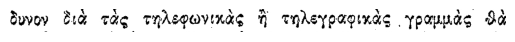

δυνον διὰ τὰς τηλεφωνικὰς ἢ τηλεγραφικὰς γραμμὰς θὰ
------------------------


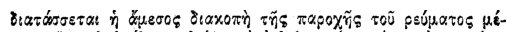

διατάσσεται ἡ ἄμεσος διακοπὴ τῆς παροχῆς τοῦ ρεύματος μέ-
------------------------


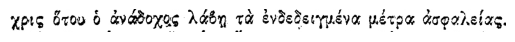

χρις ὅτου ὁ ἀνάδοχης λάβῃ τὰ ἐνδεδειγμένα μέτρα ἀσφαλείας.
------------------------


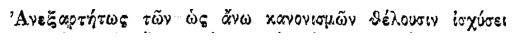

Ἀνεξαρτήτως τῶν ὡς ἀνω κανονισμῶν θέλουσιν ἰσχύσει
------------------------


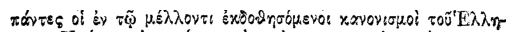

πάντες οἱ ἐν τῷ μέλλοντι ἐκδοθησόμενοι κανονισμοί τοῦ Ἑλλη-
------------------------


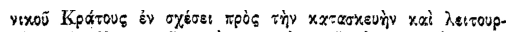

νικοῦ Κράτους ἐν σχέσει πρὸς τὴν κατασκευὴν καὶ λειτουρ-
------------------------


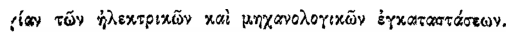

γίαν τῶν ἠλεκτρικῶν καὶ μηχανολογικῶν ἐγκαταστάσεων.
------------------------


In [35]:
# ocr the extracted lines. display the recognized text side by side with the image
text= model.ocr(images)
for img, text in zip(images[1:], text[1:]):
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    plt.show()
    print(text)
    print('------------------------')
    